In [ ]:
import pandas as pd
import plotly.express as px


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 94 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638898 sha256=45d1f9616b172bcf8b3e062095e68df73ac0727233786778f640e34768bdf9a4
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [3]:
from fbprophet import Prophet

In [4]:
#Since plotly is computationally very expensive, we need to initialise it 
import plotly.io as pio
pio.renderers.default = 'colab'

In [5]:
seconds_in_a_day = 24*60*60
print(seconds_in_a_day)

86400


Importing the dataset from Yahoo Finance

In [7]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-20,682.849976,692.130005,673.700012,680.260010,680.260010,14841900
1,2021-08-23,685.440002,712.130005,680.750000,706.299988,706.299988,20264900
2,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
3,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
4,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,886.281984,907.784322,863.130040,885.434840,885.434840,2.664172e+07
std,147.584588,150.628740,141.733513,146.011372,146.011372,8.778578e+06
min,623.849976,653.919983,620.570007,628.159973,628.159973,1.168090e+07
25%,753.264984,764.472488,735.930023,754.612488,754.612488,2.064320e+07
50%,880.385010,900.000000,853.465027,872.440002,872.440002,2.570070e+07
75%,1007.099991,1034.872467,983.725021,1009.417511,1009.417511,3.117112e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


Data Visualisation

In [13]:
px.area(df, x="Date", y="Close") #Plots date vs close price

In [14]:
px.line(df, x="Date", y="Close")

In [15]:
px.area(df, x="Date", y="Volume")

In [16]:
px.bar(df, x="Date", y="Volume") 

In [18]:
px.box(df, y="Close")

Using Facebook Prophet for developing a time series model

In [22]:
cols = ['Date','Close']
df2 = pd.DataFrame(df, columns = cols)
df2

,Date,Close
0,2021-08-20,680.260010
1,2021-08-23,706.299988
2,2021-08-24,708.489990
3,2021-08-25,711.200012
4,2021-08-26,701.159973
...,...,...
247,2022-08-15,927.960022
248,2022-08-16,919.690002
249,2022-08-17,911.989990
250,2022-08-18,908.609985


In [25]:
prophet_df = df2.rename(columns =  {'Date':'ds', 'Close':'y'})
prophet_df.head()

,ds,y
0,2021-08-20,680.260010
1,2021-08-23,706.299988
2,2021-08-24,708.489990
3,2021-08-25,711.200012
4,2021-08-26,701.159973


Creating a model using Facebook Prophet

In [26]:
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting

In [29]:
future = model.make_future_dataframe(periods = 30) #The units of period here is days, because our dataset is based on days
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-20,694.834952,551.281869,824.525620,694.834952,694.834952,-4.287081,-4.287081,-4.287081,-4.287081,-4.287081,-4.287081,0.0,0.0,0.0,690.547871
1,2021-08-23,705.934353,589.972337,838.620353,705.934353,705.934353,12.615035,12.615035,12.615035,12.615035,12.615035,12.615035,0.0,0.0,0.0,718.549388
2,2021-08-24,709.634153,566.724456,834.986486,709.634153,709.634153,2.110018,2.110018,2.110018,2.110018,2.110018,2.110018,0.0,0.0,0.0,711.744171
3,2021-08-25,713.333953,592.800663,838.147809,713.333953,713.333953,6.373394,6.373394,6.373394,6.373394,6.373394,6.373394,0.0,0.0,0.0,719.707347
4,2021-08-26,717.033753,585.604446,843.766795,717.033753,717.033753,-0.155827,-0.155827,-0.155827,-0.155827,-0.155827,-0.155827,0.0,0.0,0.0,716.877927


yhat is our prediction column

In [33]:
px.line(forecast, x="ds", y="yhat")

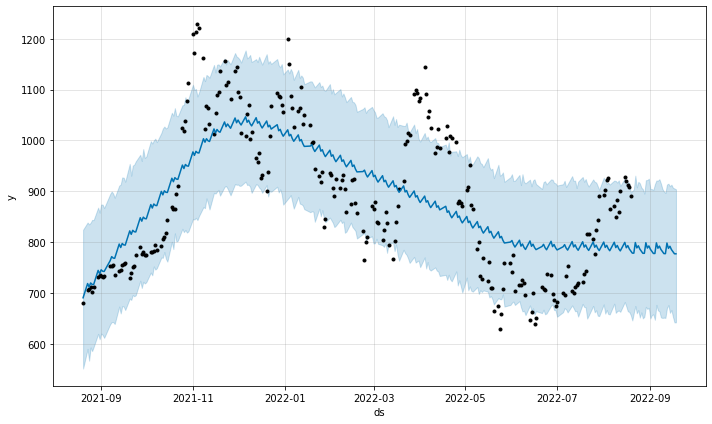

In [35]:
fig = model.plot(forecast, xlabel = "ds", ylabel = "y")

In the above graph, the black dots represent the actual values, and the blue shaded region represent our predicted values along with tolerance

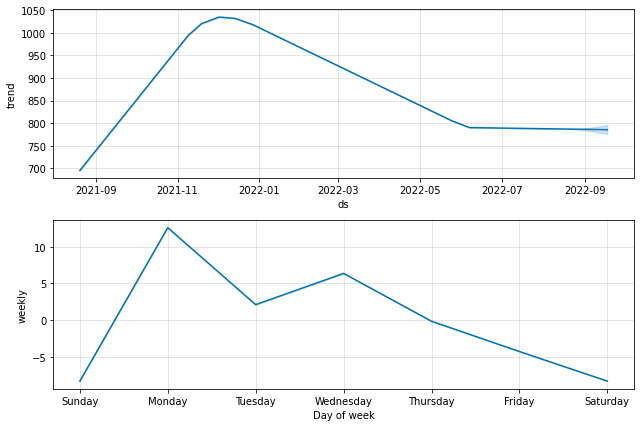

In [37]:
fig2 = model.plot_components(forecast)

Downloading the Forecasting Data

In [39]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>